## Meta -

This file shows the different Multilabel oversampling techniques there are

## Author - Rahul Suresh

## Preparing Data

In [1]:
from sklearn.datasets import make_multilabel_classification

x,y=make_multilabel_classification(n_samples=1000, n_features=20, 
                                             n_classes=10, n_labels=3, length=100, 
                                             allow_unlabeled=True, sparse=False, return_indicator="dense", 
                                             return_distributions=False, random_state=None)

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = .2,random_state=12)

In [3]:
x_train.shape

(800, 20)

## Upsample

In [4]:
import numpy as np

def label_counter(y):
    return np.unique(y,return_counts=True)

In [5]:
from sklearn.preprocessing import MultiLabelBinarizer

def to_multilabel_csr(y):
    multilabel_binarizer = MultiLabelBinarizer()
    multilabel_binarizer.fit(y.rows)
    y = multilabel_binarizer.transform(y.rows)
    return y

In [6]:
from imblearn.over_sampling import RandomOverSampler

def ros_sampler(x_train,yt,lp):
    ros = RandomOverSampler(random_state=42)

    x_resampled, y_resampled = ros.fit_sample(x_train, yt)

    # Inverts the ML-MC transformation to recreate the ML set
    y_resampled = lp.inverse_transform(y_resampled)

    y_resampled = to_multilabel_csr(y_resampled)
    return x_resampled,y_resampled

In [7]:
from imblearn.over_sampling import SMOTE

# import warnings
# warnings.filterwarnings(action='ignore')

# Problem : Encoding sample has a single unique appearance

def smote_sampler(x_train,yt,lp):
    labels,vals=label_counter(yt)

    ratio_list=[]
    for i in range(len(np.unique(yt))):
        if (vals[i]>vals.min()):
            ratio_list.append(i)

    sm = SMOTE(random_state=42, ratio = {i:100 for i in ratio_list}, k_neighbors =vals.min())

    x_res, y_res = sm.fit_sample(x_train, yt)

    y_res = lp.inverse_transform(y_res)

    y_res = to_multilabel_csr(y_res)
    return x_res,y_res

In [8]:
from imblearn.over_sampling import ADASYN

# import warnings
# warnings.filterwarnings(action='ignore')

def adasyn_sampler(x_train,yt,lp):

    labels,vals=label_counter(yt)

    ratio_list=[]
    for i in range(len(np.unique(yt))):
        if (vals[i]>vals.min()):
            ratio_list.append(i)

    ad = ADASYN(random_state=42, ratio = {i:100 for i in ratio_list}, n_neighbors =vals.min())

    x_res_ad, y_res_ad = ad.fit_sample(x_train, yt)

    y_res_ad = lp.inverse_transform(y_res_ad)

    y_res_ad = to_multilabel_csr(y_res_ad)
    return x_res_ad,y_res_ad

In [9]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

def ros_sampler(x_train,yt,lp):
    ros = RandomOverSampler(random_state=42)

    x_resampled, y_resampled = ros.fit_sample(x_train, yt)

    # Inverts the ML-MC transformation to recreate the ML set
    y_resampled = lp.inverse_transform(y_resampled)

    y_resampled = to_multilabel_csr(y_resampled)
    return x_resampled,y_resampled

def hybrid_sampler(x_train,yt,lp):
    labels,vals=label_counter(yt)

    ratio_list=[]
    delete_list=[]
    for i in range(len(np.unique(yt))):
        if (vals[i]>vals.min()):
            ratio_list.append(i)
        else:
            delete_list.append(i)

    sm = SMOTE(random_state=42, ratio = {i:100 for i in ratio_list}, k_neighbors =vals.min())

    x_res, y_res = sm.fit_sample(x_train, yt)

    y_res = lp.inverse_transform(y_res)

    y_res = to_multilabel_csr(y_res)
    
    ros = RandomOverSampler(random_state=42)

    x_train_ros=[]
    yt_ros =[]
    
    for i in range(len(delete_list)):
        x_train_ros.append(x_train[i])
        yt_ros.append(yt[i])
        
    x_resampled, y_resampled = ros.fit_sample(x_train_ros, yt_ros)

    # Inverts the ML-MC transformation to recreate the ML set
    y_resampled = lp.inverse_transform(y_resampled)

    y_resampled = to_multilabel_csr(y_resampled)
    
    
    return np.concatenate((x_res, x_resampled), axis=0),np.concatenate((y_res, y_resampled), axis=0)

In [10]:
from skmultilearn.problem_transform import LabelPowerset

lp = LabelPowerset()

# Applies the above stated multi-label (ML) to multi-class (MC) transformation.
yt = lp.transform(y_train)


### RandomOverSampler

In [11]:
x_resampled,y_resampled=ros_sampler(x_train,yt,lp)

### SMOTE

In [12]:
x_res,y_res=smote_sampler(x_train,yt,lp)

/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (100) in class 0 will be larger than the number of samples in the majority class (class #14 -> 48)
  n_samples_majority))
/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (100) in class 1 will be larger than the number of samples in the majority class (class #14 -> 48)
  n_samples_majority))
/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (100) in class 2 will be larger than the number of samples in the majority class (class #14 -> 48)
  n_samples_majority))
/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number o

### ADASYN

In [13]:
x_res_ad,y_res_ad=adasyn_sampler(x_train,yt,lp)

/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (100) in class 0 will be larger than the number of samples in the majority class (class #14 -> 48)
  n_samples_majority))
/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (100) in class 1 will be larger than the number of samples in the majority class (class #14 -> 48)
  n_samples_majority))
/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (100) in class 2 will be larger than the number of samples in the majority class (class #14 -> 48)
  n_samples_majority))
/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number o

### Hybrid
#### Use ADASYN/SMOTE where n_samples>n_neighbours
#### Use RandomOverSample for the rest

In [14]:
x_hybrid,y_hybrid=hybrid_sampler(x_train,yt,lp)

/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (100) in class 0 will be larger than the number of samples in the majority class (class #14 -> 48)
  n_samples_majority))
/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (100) in class 1 will be larger than the number of samples in the majority class (class #14 -> 48)
  n_samples_majority))
/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (100) in class 2 will be larger than the number of samples in the majority class (class #14 -> 48)
  n_samples_majority))
/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number o

[Bonus](https://stackoverflow.com/questions/49395939/smote-initialisation-expects-n-neighbors-n-samples-but-n-samples-n-neighbo)

## Before Upsampling

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_train)

print(pca_result.shape)

x1 = pca_result[:,0]
x2 = pca_result[:,1]

(800, 2)


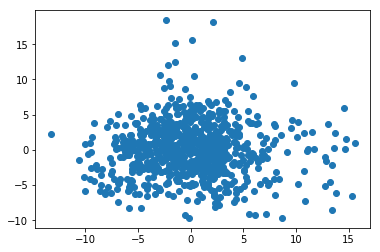

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import matplotlib

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(x1,x2)

plt.show()

## After Upsampling

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_hybrid)

print(pca_result.shape)

x1 = pca_result[:,0]
x2 = pca_result[:,1]

(11934, 2)


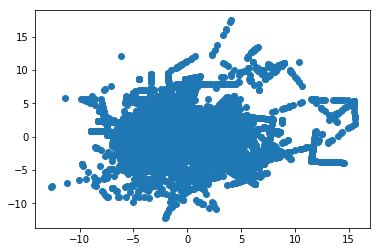

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import matplotlib

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(x1,x2)

plt.show()

[Bonus Content](https://www.datasciencecentral.com/profiles/blogs/handling-imbalanced-data-sets-in-supervised-learning-using-family)